# Episode 3: Plotting and Tabular Data

## Selecting rows and columns

In [91]:
polygon_results.info()

<Table length=140339>
   name    dtype    unit                                       description                                    
--------- ------- -------- -----------------------------------------------------------------------------------
source_id   int64          Unique source identifier (unique within a particular Data Release) (source_id) (G2)
       ra float64      deg                                Barycentric right ascension (ICRS) at Ep=2015.5 (ra)
      dec float64      deg                                   Barycentric declination (ICRS) at Ep=2015.5 (dec)
     pmra float64 mas / yr                ? Proper motion in right ascension direction (pmRA*cosDE) (pmra) (3)
    pmdec float64 mas / yr                                ? Proper motion in declination direction (pmdec) (4)
 parallax float64      mas                                              ? Absolute stellar parallax (parallax)


In [92]:
polygon_results.colnames

['source_id', 'ra', 'dec', 'pmra', 'pmdec', 'parallax']

Select a column 

In [93]:
polygon_results['ra']

146.25027906702
146.32228572922
146.31743441943
146.21614836191
146.20333869328
146.20137461153
146.14573420631
146.16288826603
146.27155869065
...
142.66090606952


In [94]:
type(polygon_results['ra'])

astropy.table.column.MaskedColumn

Select a row

In [95]:
polygon_results[0]

source_id,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
621490014069058944,146.25027906702,19.28661719637,1.247,-7.877,-0.3693


In [96]:
type(polygon_results[0])

astropy.table.row.Row

Order doesn't matter when selecting an individual entry

In [97]:
polygon_results['ra'][0]

146.25027906702

## Scatter Plot

In [98]:
import matplotlib.pyplot as plt

In [99]:
%matplotlib inline

Text(0, 0.5, 'dec (degree ICRS)')

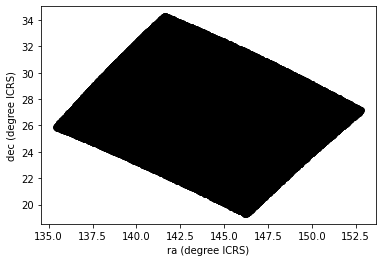

In [100]:
x = polygon_results['ra']
y = polygon_results['dec']
plt.plot(x, y, 'ko')

plt.xlabel('ra (degree ICRS)')
plt.ylabel('dec (degree ICRS)')

### Plot vs Scatter
* scatter: more customizable (e.g. color by a third column)
* plot: faster and more basic

### Exercise: 
In the call to `plt.plot`, use the keyword argument `markersize` to make the markers smaller.
Then add the keyword argument `alpha` to make the markers partly transparent.
Adjust these arguments until you think the figure shows the data most clearly.

Note: Once you have made these changes, you might notice that the figure shows stripes with lower density of stars. These stripes are caused by the way Gaia scans the sky, which you can read about here. The dataset we are using, Gaia Data Release 2, covers 22 months of observations; during this time, some parts of the sky were scanned more than others.

In [19]:
# Solution
x = polygon_results['ra']
y = polygon_results['dec']
plt.plot(x, y, 'ko', markersize=0.1, alpha=0.1)

plt.xlabel('ra (degree ICRS)')
plt.ylabel('dec (degree ICRS)')

NameError: name 'polygon_results' is not defined

## Transform Back to the GD1 frame

stars we selected in ICRS frame from the Gaia database

2 goals:
* in GD1 space it is easy to cut a rectangle around GD1 (and not some other weird shape)
* Expect coherent proper motion from stars in GD1 (in phi1 direction, 0 in phi2)

In [102]:
skycoord = SkyCoord(ra=polygon_results['ra'], dec=polygon_results['dec'])

In [103]:
distance = 8 * u.kpc #best estimate for GD-1, parallax small therefore unreliable
radial_velocity= 0 * u.km/u.s # not used but we need it - this is a place holder

skycoord = SkyCoord(ra=polygon_results['ra'], 
                    dec=polygon_results['dec'],
                    pm_ra_cosdec=polygon_results['pmra'],
                    pm_dec=polygon_results['pmdec'], 
                    distance=distance, 
                    radial_velocity=radial_velocity)

In [104]:
transformed = skycoord.transform_to(gd1_frame)

## Reflex Correction

motion of solar system around galactic center

In [105]:
from gala.coordinates import reflex_correct

skycoord_gd1 = reflex_correct(transformed)

Text(0, 0.5, 'phi2 (degree GD1)')

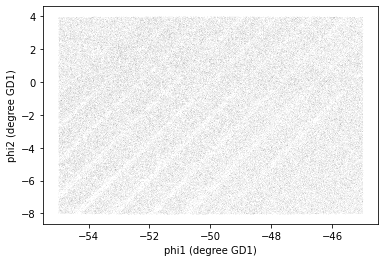

In [106]:
x = skycoord_gd1.phi1
y = skycoord_gd1.phi2
plt.plot(x, y, 'ko', markersize=0.1, alpha=0.1)

plt.xlabel('phi1 (degree GD1)')
plt.ylabel('phi2 (degree GD1)')

## Pandas DataFrame

In [107]:
type(polygon_results)

astropy.table.table.Table

In [108]:
type(skycoord_gd1)

astropy.coordinates.sky_coordinate.SkyCoord

In [109]:
polygon_results['phi1'] = skycoord_gd1.phi1
polygon_results['phi2'] = skycoord_gd1.phi2
polygon_results.info()

<Table length=140339>
   name    dtype    unit                                       description                                        class    
--------- ------- -------- ----------------------------------------------------------------------------------- ------------
source_id   int64          Unique source identifier (unique within a particular Data Release) (source_id) (G2) MaskedColumn
       ra float64      deg                                Barycentric right ascension (ICRS) at Ep=2015.5 (ra) MaskedColumn
      dec float64      deg                                   Barycentric declination (ICRS) at Ep=2015.5 (dec) MaskedColumn
     pmra float64 mas / yr                ? Proper motion in right ascension direction (pmRA*cosDE) (pmra) (3) MaskedColumn
    pmdec float64 mas / yr                                ? Proper motion in declination direction (pmdec) (4) MaskedColumn
 parallax float64      mas                                              ? Absolute stellar parallax (parallax)

In [110]:
polygon_results['pm_phi1'] = skycoord_gd1.pm_phi1_cosphi2
polygon_results['pm_phi2'] = skycoord_gd1.pm_phi2
polygon_results.info()

<Table length=140339>
   name    dtype    unit                                       description                                        class    
--------- ------- -------- ----------------------------------------------------------------------------------- ------------
source_id   int64          Unique source identifier (unique within a particular Data Release) (source_id) (G2) MaskedColumn
       ra float64      deg                                Barycentric right ascension (ICRS) at Ep=2015.5 (ra) MaskedColumn
      dec float64      deg                                   Barycentric declination (ICRS) at Ep=2015.5 (dec) MaskedColumn
     pmra float64 mas / yr                ? Proper motion in right ascension direction (pmRA*cosDE) (pmra) (3) MaskedColumn
    pmdec float64 mas / yr                                ? Proper motion in declination direction (pmdec) (4) MaskedColumn
 parallax float64      mas                                              ? Absolute stellar parallax (parallax)

### DataFrames vs Table

* pandas general purpose, across domains
* no units

In [111]:
import pandas as pd

results_df = polygon_results.to_pandas()

In [112]:
results_df.shape

(140339, 10)

In [113]:
results_df.head()

,source_id,ra,dec,pmra,pmdec,parallax,phi1,phi2,pm_phi1,pm_phi2
0,621490014069058944,146.250279,19.286617,1.247,-7.877,-0.3693,-54.993510,-7.966407,-0.292378,-2.974688
1,621492075653372160,146.322286,19.344490,-2.399,-2.333,0.7228,-54.906113,-7.988219,2.115459,3.207709
2,621492178732589952,146.317434,19.361869,6.749,0.110,0.9157,-54.894499,-7.974410,9.412211,-2.826254
3,621493106445518720,146.216148,19.317208,2.248,-2.692,0.5535,-54.987184,-7.922428,4.512837,-0.783390
4,621493209524733312,146.203339,19.315017,-2.752,-0.350,-0.1249,-54.996058,-7.913844,3.524591,4.649224


In [114]:
def make_dataframe(table):
    """Transform coordinates from ICRS to GD-1 frame.
    
    table: Astropy Table
    
    returns: Pandas DataFrame
    """
    #Create a SkyCoord object with the coordinates and proper motions
    # in the input table
    skycoord = SkyCoord(
               ra=table['ra'], 
               dec=table['dec'],
               pm_ra_cosdec=table['pmra'],
               pm_dec=table['pmdec'], 
               distance=8*u.kpc, 
               radial_velocity=0*u.km/u.s)

    # Define the GD-1 reference frame
    gd1_frame = GD1Koposov10()

    # Transform input coordinates to the GD-1 reference frame
    transformed = skycoord.transform_to(gd1_frame)

    # Correct GD-1 coordinates for solar system motion around galactic center
    skycoord_gd1 = reflex_correct(transformed)

    #Add GD-1 reference frame columns for coordinates and proper motions
    table['phi1'] = skycoord_gd1.phi1
    table['phi2'] = skycoord_gd1.phi2
    table['pm_phi1'] = skycoord_gd1.pm_phi1_cosphi2
    table['pm_phi2'] = skycoord_gd1.pm_phi2

    # Create DataFrame
    df = table.to_pandas()

    return df

In [115]:
results_df = make_dataframe(polygon_results)


# Saving the DataFrame

can convert to astropy table and save as FITS - or-

In [116]:
from astropy.table import Table

results_table = Table.from_pandas(results_df)
type(results_table)

astropy.table.table.Table

Save as HDF5
*  binary
* multiple datasets
* header info

In [117]:
filename = 'gd1_data.hdf'

results_df.to_hdf(filename, 'results_df', mode='w')